<a href="https://colab.research.google.com/github/Pepe-Padilla/deep-learning/blob/main/algoritmosGeneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos genéticos - DeepLearning


Para dar el extra que siempre viene bien he decidido implementar un algoritmo genético, y el problema a resolver que se me ocurrio es el dilema del viajero:

## Algoritmo Genético para el Problema del Viajero (TSP)

Este experimento implementa un algoritmo genético simple para resolver el problema NP del viajero (Travelling Salesman Problem), donde se busca la ruta más corta para visitar un conjunto de ciudades exactamente una vez y volver al punto de origen.

### Componentes clave:

- **Ciudades:** Las ciudades son un conjunto de códenadas X y Y de un plano carteciano simpre genereado al azar.
- **Premisa:** El algoritmo buscara el camino más corto viajando a todas las ciudades, se calculará con una simple distancia entre 2 puntos.
- **Genes:** Cada gen será la coordenada de una de las ciudades
- **Cromosomas:** Cada cromosoma es una permutación de índices que representan el orden en que se visitan las ciudades.
- **Fitness:** Se mide como la distancia total recorrida.
- **Mutaciones:**
  - Tipo 1: Intercambio de dos ciudades aleatorias (4%).
  - Tipo 2: Rotación de los primeros `n` elementos (2%).
- **Crossover:** Mezcla entre padre y madre con corte aleatorio entre 40–60% de genes del padre y resto de la madre.
- **Incesto:** Si el hijo es idéntico a uno de los padres, se aplica automáticamente ambas mutaciones.
- **Visualización:** La mejor ruta actual se dibuja en azul, y la anterior en gris translúcido.

> A ver en que lio me metí.

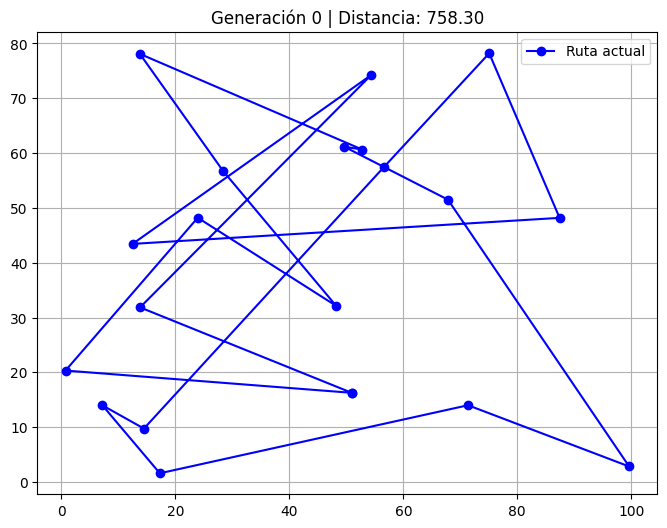

<Figure size 640x480 with 0 Axes>

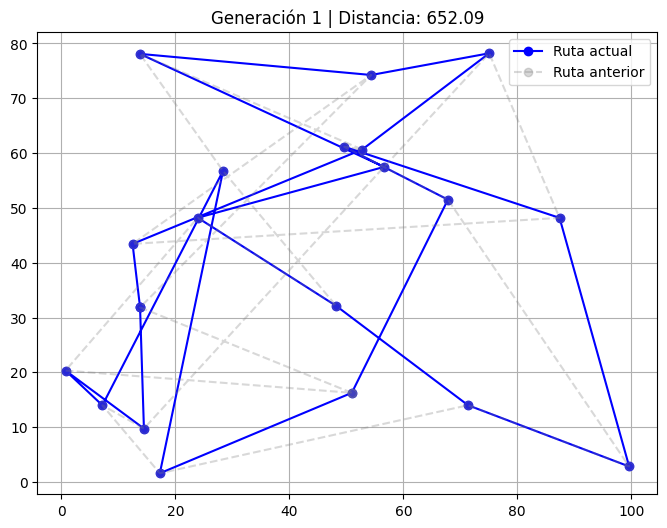

<Figure size 640x480 with 0 Axes>

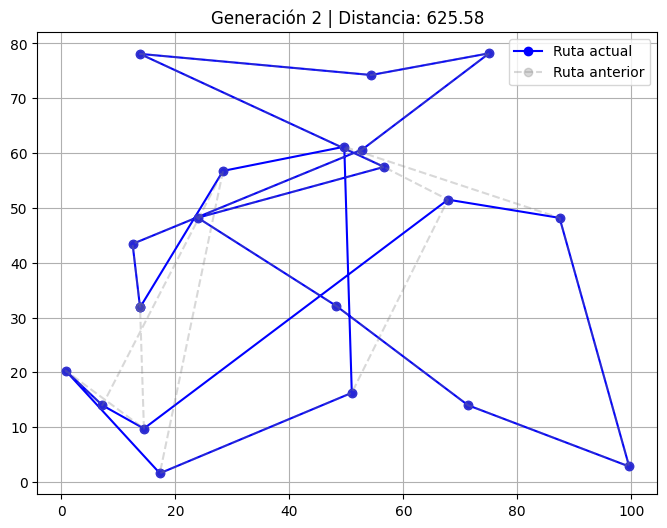

<Figure size 640x480 with 0 Axes>

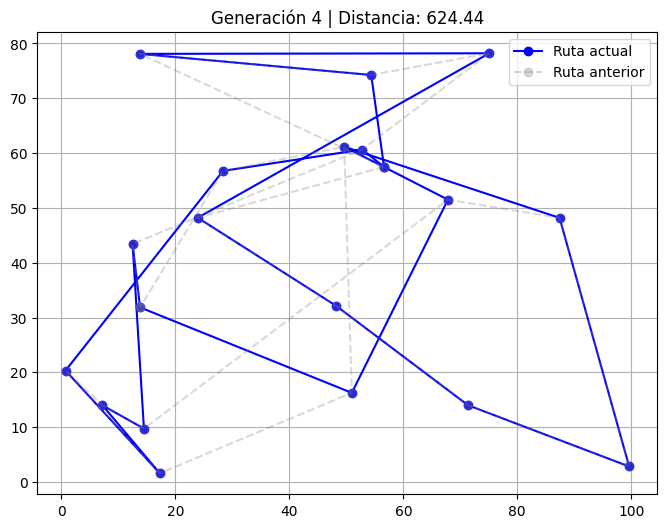

<Figure size 640x480 with 0 Axes>

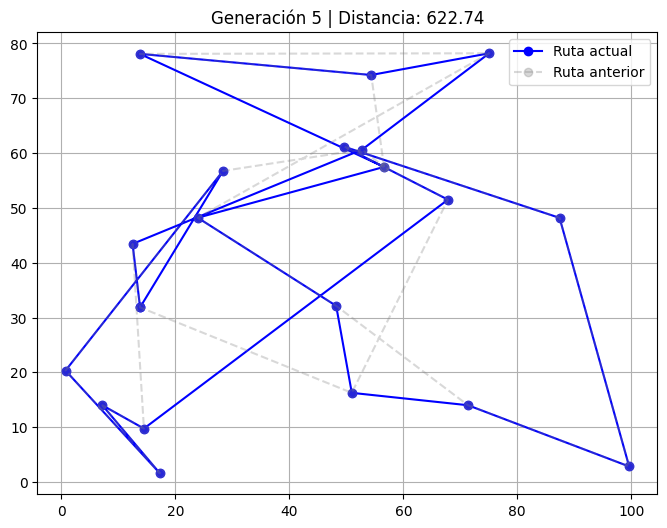

<Figure size 640x480 with 0 Axes>

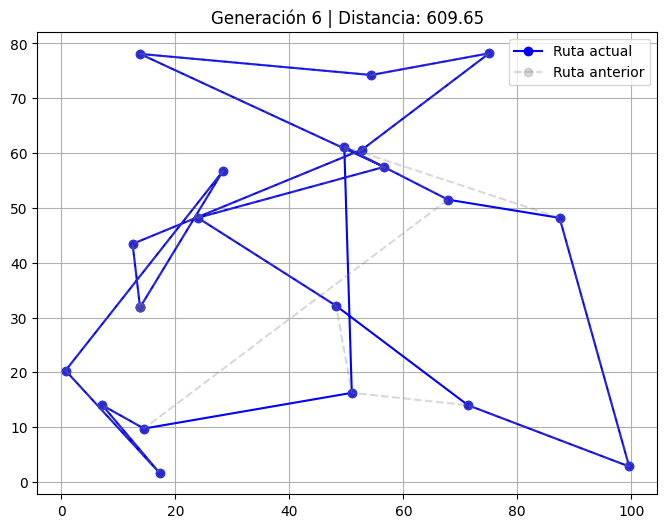

<Figure size 640x480 with 0 Axes>

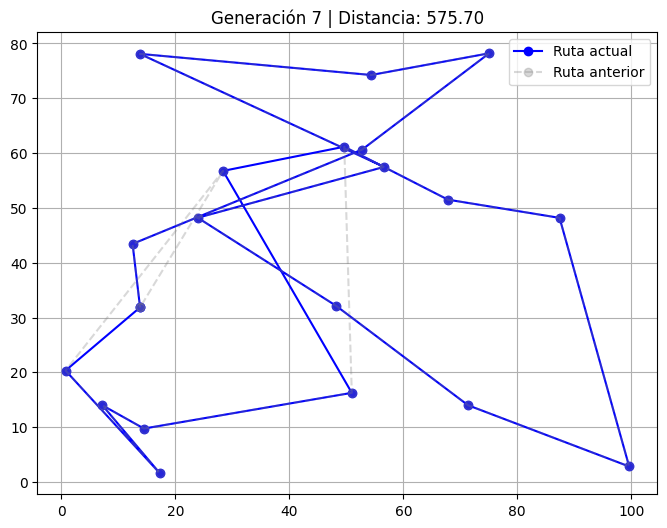

<Figure size 640x480 with 0 Axes>

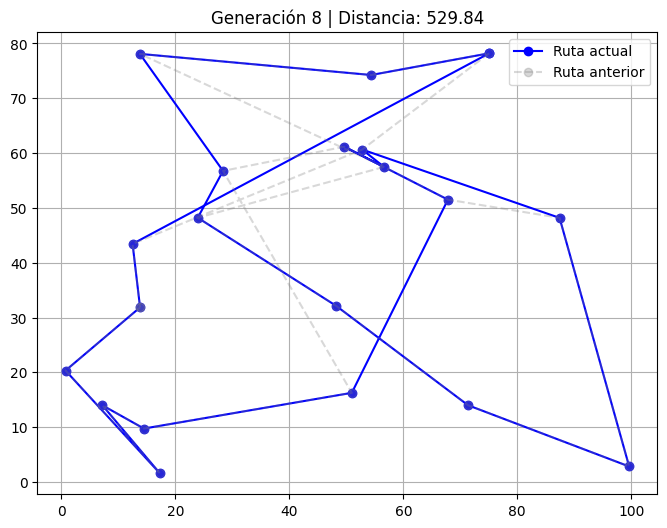

<Figure size 640x480 with 0 Axes>

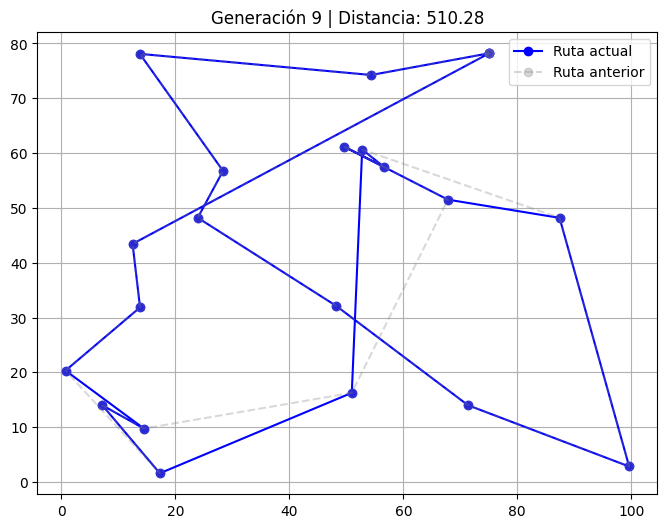

<Figure size 640x480 with 0 Axes>

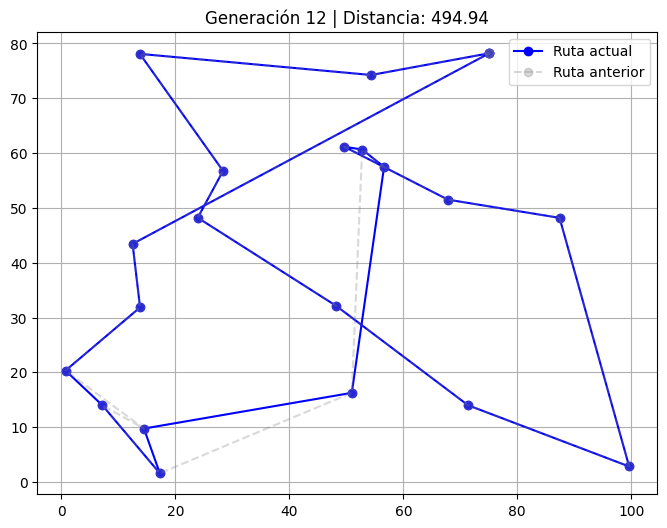

<Figure size 640x480 with 0 Axes>

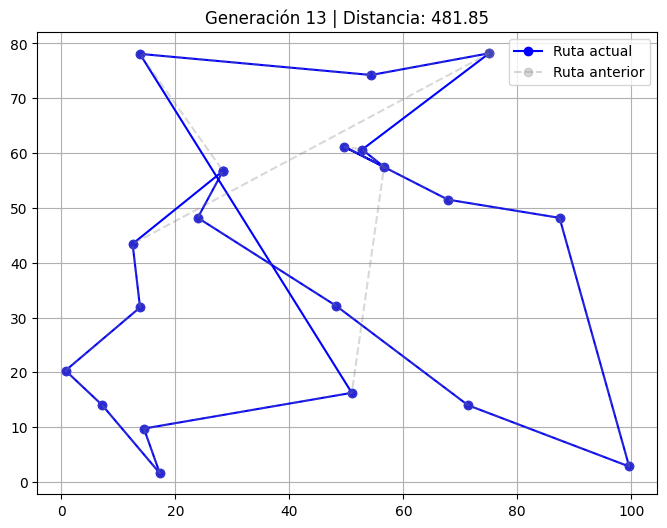

<Figure size 640x480 with 0 Axes>

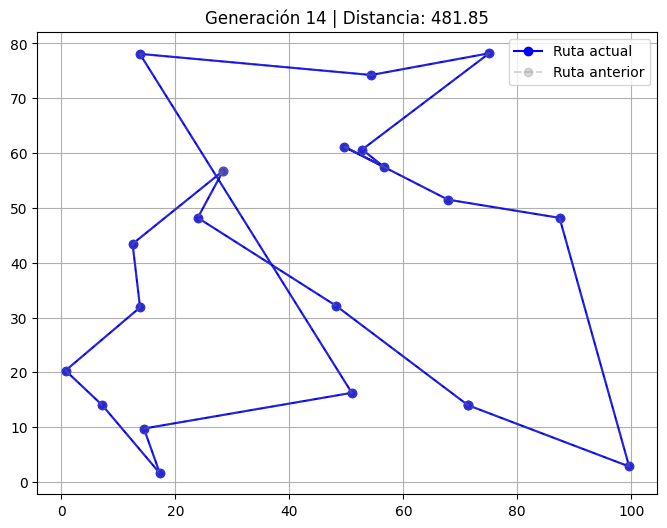

<Figure size 640x480 with 0 Axes>

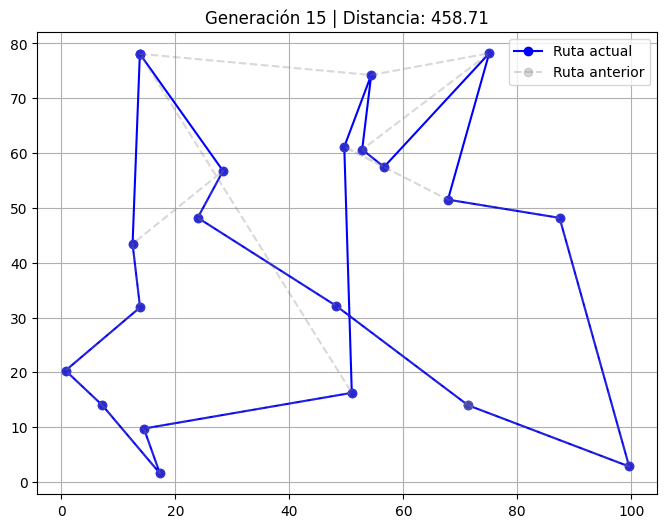

<Figure size 640x480 with 0 Axes>

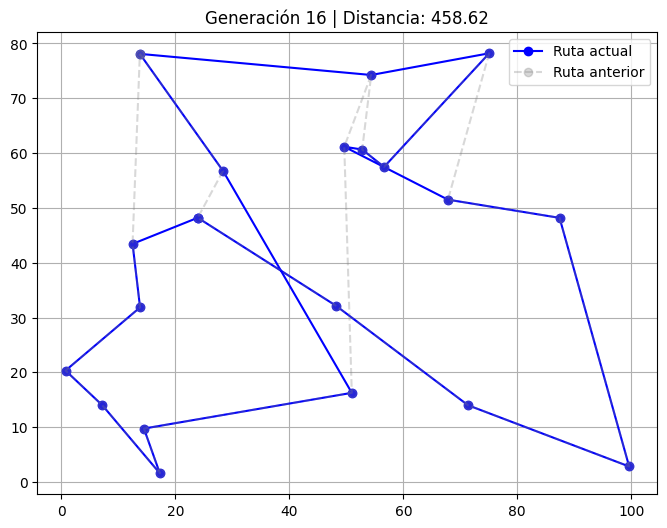

<Figure size 640x480 with 0 Axes>

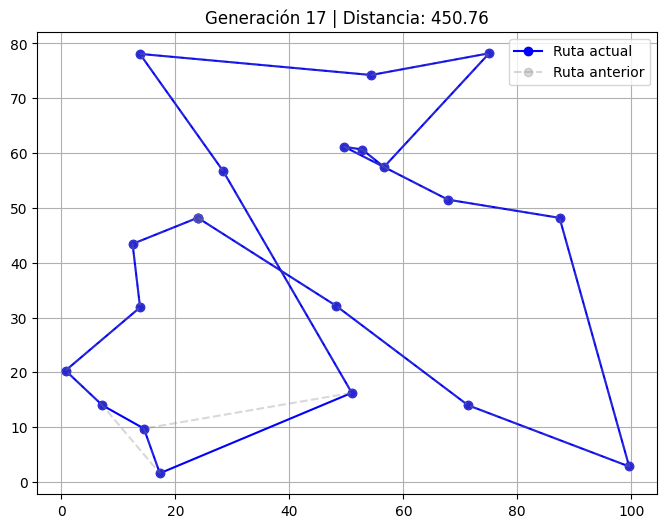

<Figure size 640x480 with 0 Axes>

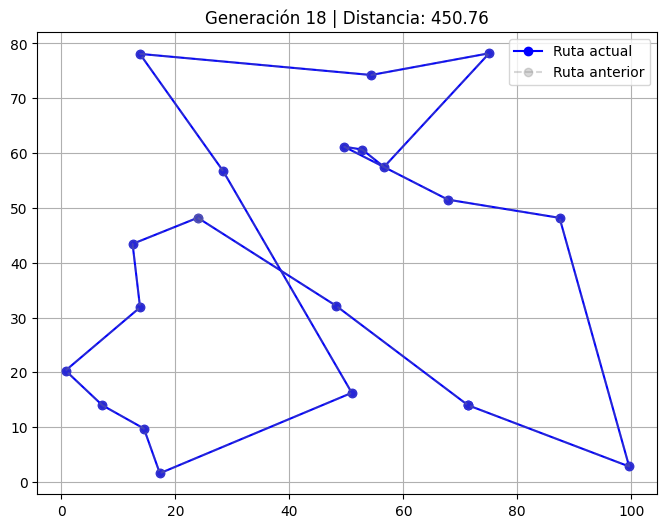

<Figure size 640x480 with 0 Axes>

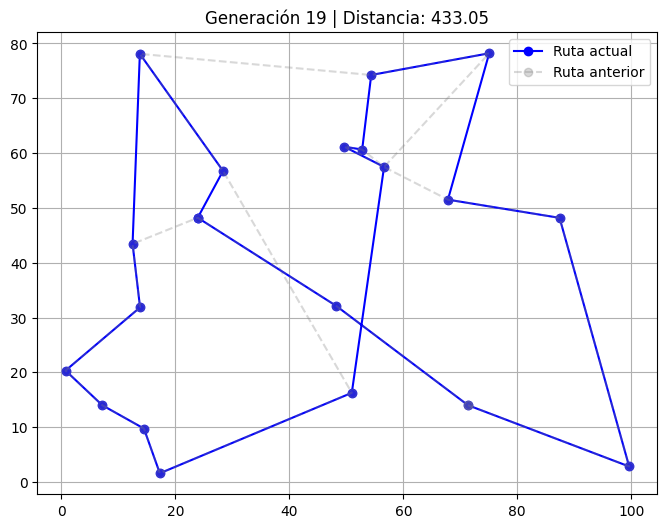

<Figure size 640x480 with 0 Axes>

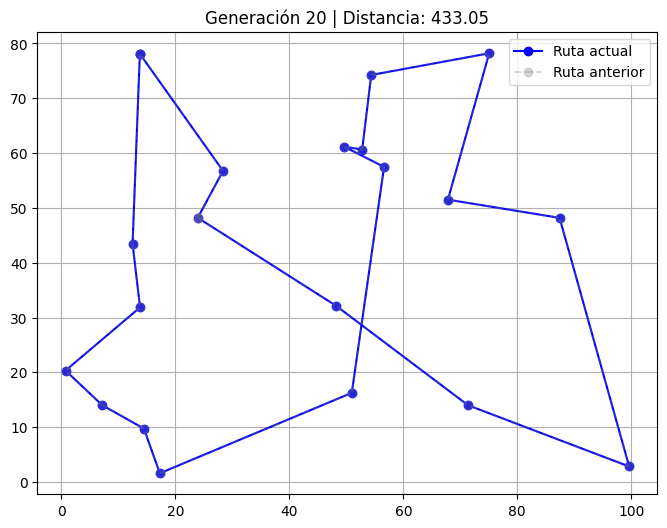

<Figure size 640x480 with 0 Axes>

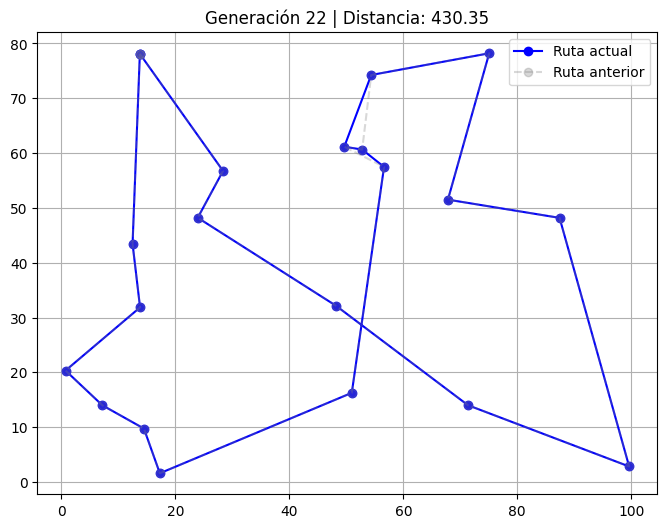

<Figure size 640x480 with 0 Axes>

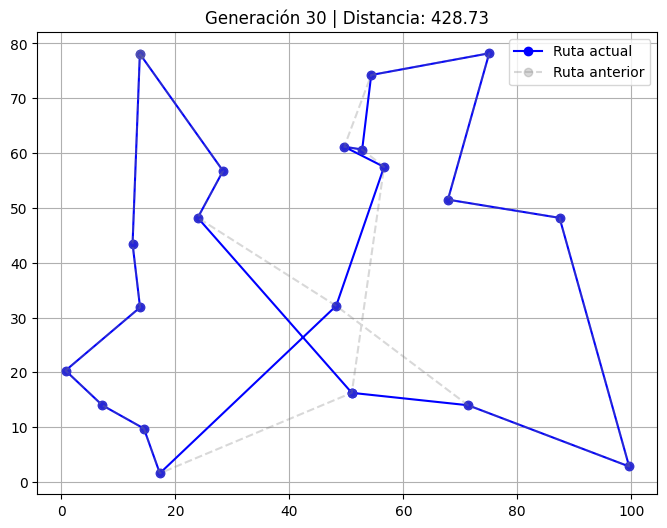

<Figure size 640x480 with 0 Axes>

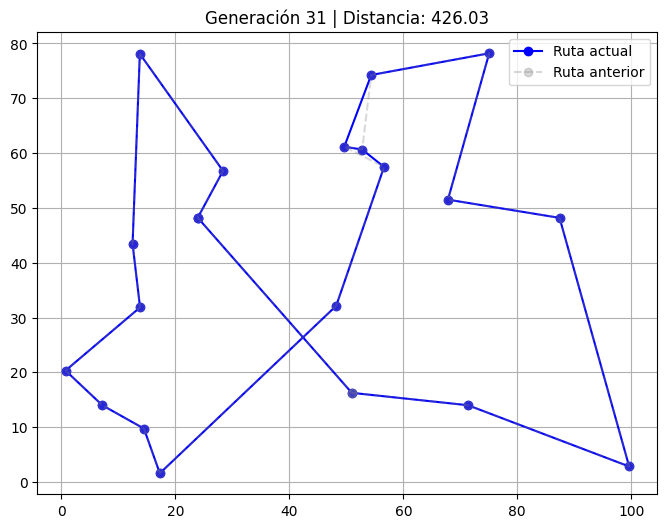

<Figure size 640x480 with 0 Axes>

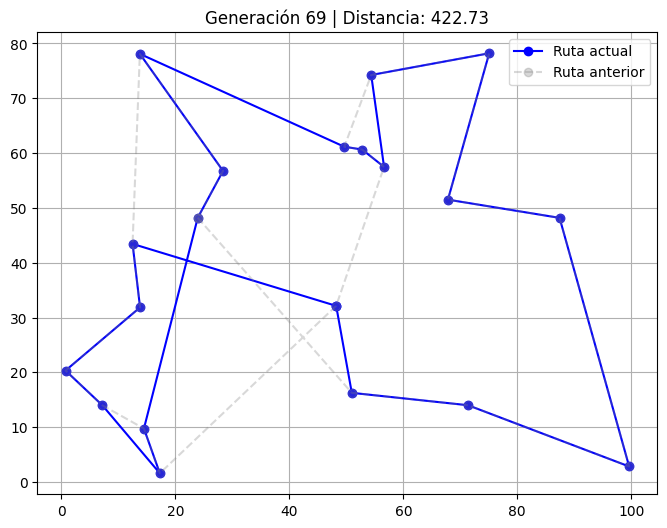

<Figure size 640x480 with 0 Axes>

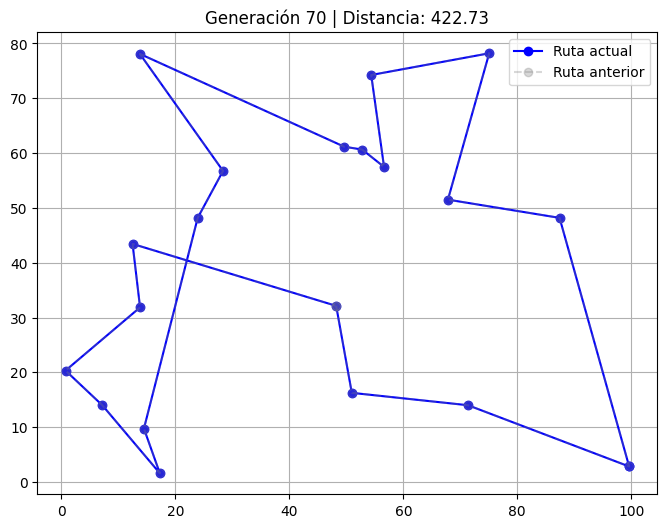

<Figure size 640x480 with 0 Axes>

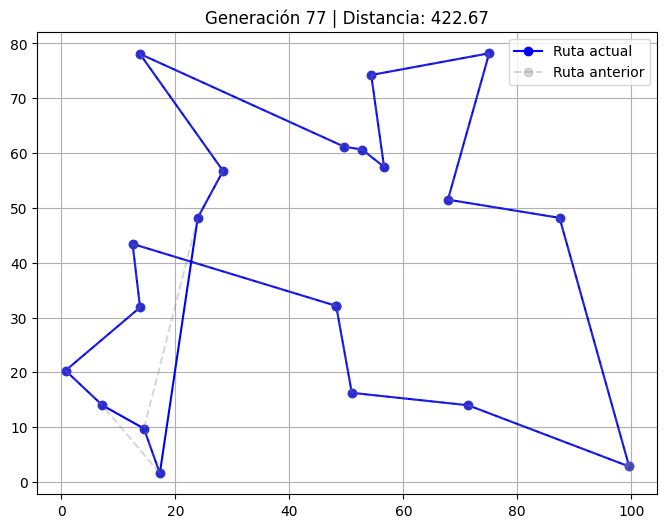

<Figure size 640x480 with 0 Axes>

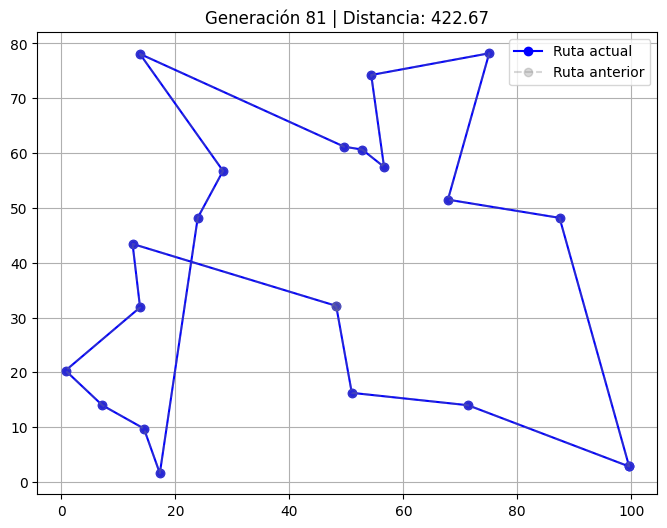

<Figure size 640x480 with 0 Axes>

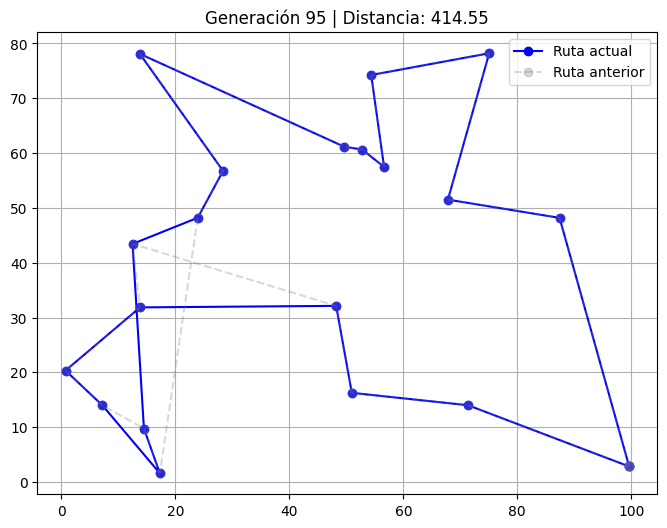

<Figure size 640x480 with 0 Axes>

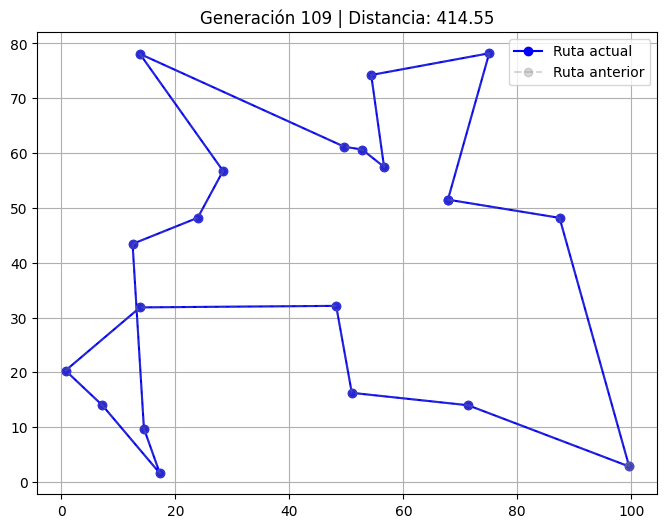

<Figure size 640x480 with 0 Axes>

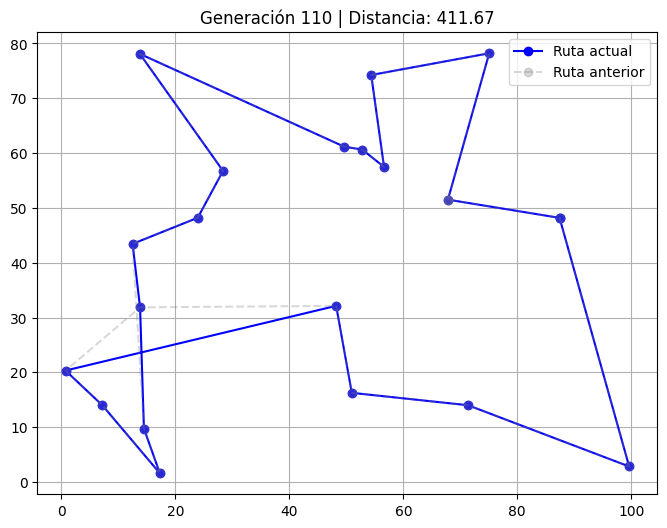

<Figure size 640x480 with 0 Axes>

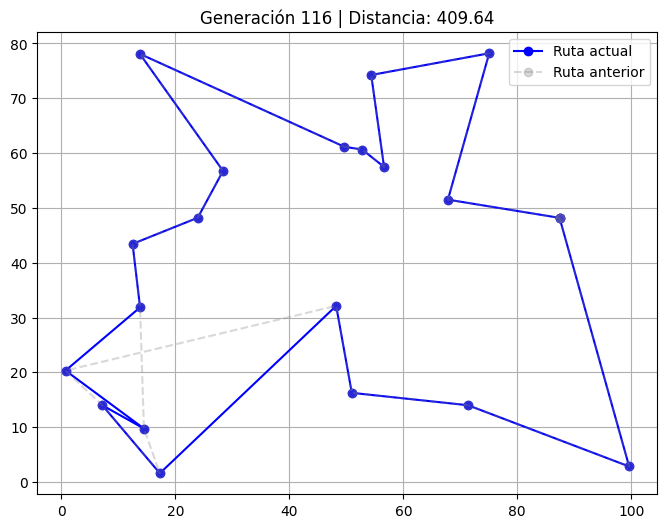

<Figure size 640x480 with 0 Axes>

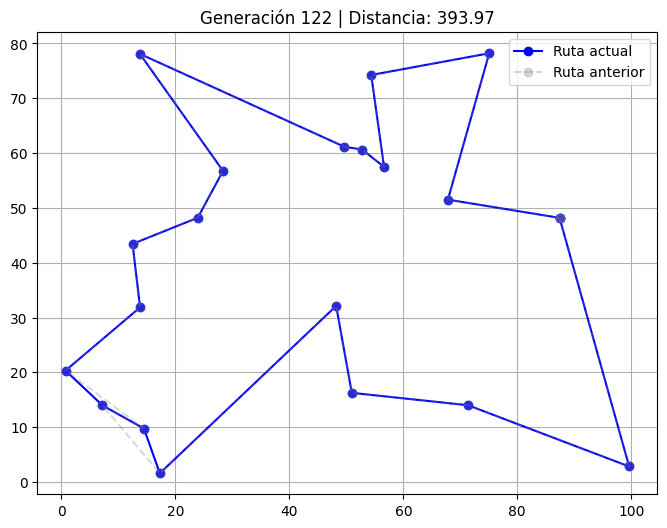

Mejor distancia encontrada: 393.9748779281905


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# ----- Configuración inicial -----
N_CIUDADES = 20
TAM_POBLACION = 100
GENERACIONES = 300
ELITISMO = 2

PROB_MUT1 = 0.04
PROB_MUT2 = 0.02

# ----- Generación de ciudades -----
ciudades = np.random.uniform(0, 100, (N_CIUDADES, 2))

def calcular_distancia(ruta):
    return sum(np.linalg.norm(ciudades[ruta[i]] - ciudades[ruta[(i+1)%N_CIUDADES]]) for i in range(N_CIUDADES))

# ----- Inicializar población -----
def crear_poblacion():
    return [random.sample(range(N_CIUDADES), N_CIUDADES) for _ in range(TAM_POBLACION)]

# ----- Mutaciones -----
def mutacion_1(ruta):
    i, j = random.sample(range(N_CIUDADES), 2)
    ruta[i], ruta[j] = ruta[j], ruta[i]
    return ruta

def mutacion_2(ruta):
    n = random.randint(1, 3)
    return ruta[n:] + ruta[:n]

# ----- Crossover -----
def cruzar(padre, madre):
    corte = random.randint(int(N_CIUDADES * 0.4), int(N_CIUDADES * 0.6))
    hijo_inicio = padre[:corte]
    hijo_restante = [ciudad for ciudad in madre if ciudad not in hijo_inicio]
    hijo = hijo_inicio + hijo_restante

    # Incesto
    if hijo == padre or hijo == madre:
        hijo = mutacion_2(mutacion_1(hijo))
    return hijo

# ----- Evolución -----
def evolucionar(poblacion, generaciones):
    mejor_ruta = None
    mejor_distancia = float('inf')
    ruta_anterior = None

    for gen in range(generaciones):
        poblacion.sort(key=calcular_distancia)
        nueva_poblacion = poblacion[:ELITISMO]  # elitismo

        while len(nueva_poblacion) < TAM_POBLACION:
            padre, madre = random.sample(poblacion[:20], 2)  # Selección por torneo
            hijo = cruzar(padre, madre)

            if random.random() < PROB_MUT1:
                hijo = mutacion_1(hijo)
            if random.random() < PROB_MUT2:
                hijo = mutacion_2(hijo)

            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion

        # Visualización
        mejor_ruta_actual = poblacion[0]
        distancia_actual = calcular_distancia(mejor_ruta_actual)

        if distancia_actual < mejor_distancia:
            ruta_anterior = mejor_ruta
            mejor_ruta = mejor_ruta_actual.copy()
            mejor_distancia = distancia_actual
            graficar_ruta(ciudades, mejor_ruta, ruta_anterior, gen, mejor_distancia)

    return mejor_ruta, mejor_distancia

# ----- Visualización -----
def graficar_ruta(ciudades, ruta, ruta_anterior, gen, distancia):
    plt.figure(figsize=(8, 6))
    x, y = ciudades[ruta].T
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    plt.plot(x, y, '-o', color='blue', label='Ruta actual')

    if ruta_anterior:
        xa, ya = ciudades[ruta_anterior].T
        xa = np.append(xa, xa[0])
        ya = np.append(ya, ya[0])
        plt.plot(xa, ya, '--o', color='gray', alpha=0.3, label='Ruta anterior')

    plt.title(f"Generación {gen} | Distancia: {distancia:.2f}")
    plt.legend()
    plt.grid()
    plt.pause(0.1)
    plt.clf()

# ----- Ejecución principal -----
poblacion = crear_poblacion()
mejor, dist = evolucionar(poblacion, GENERACIONES)
plt.close()
print("Mejor distancia encontrada:", dist)


Debo de aceptar que en la universidad ya había hecho este y otros algorítmos, pero volver a implementarlo desde cero y en python (antes lo había hecho en matlab) fue muy gratificante. A difrencia que en clase, el problema del TSP si es mejor para el algoritmo, también tuve tiempo de implementar mejores medidas, como la detección de incesto e incluso 2 tipo de mutación. También me gustó establecer un porcentaje aleatorio del genes del padre y el resto de la madre:
``` python
corte = random.randint(int(N_CIUDADES * 0.4), int(N_CIUDADES * 0.6))
hijo_inicio = padre[:corte]
```